#  INSTANCE SEGMENTATION

### FASTER R-CNN

In [3]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils
from collections import Counter
import cv2
from collections import Counter
import cv2
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils


### Mask RCNN

In [4]:
def Obj_Count(ids, scores, net):
    objects=[]
    final_list=[]
    for idd, score in zip (ids, scores):
        for i,c in enumerate (net.classes):
            if score[0]>.5 and i==idd:
                objects.append(c)
    freq = {}
    for item in objects:
        if (item in freq):
            freq[item] += 1
        else: freq[item] = 1
            
    for k,v in freq.items():
        new_item=str(k) +' '+str(v)
        final_list.append(new_item)
    return final_list

In [5]:

def MASK_RCNN(pic):
    net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)
    x, orig_img = data.transforms.presets.rcnn.load_test(pic)
    im = cv2.imread(pic, 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]
    width, height = orig_img.shape[1], orig_img.shape[0]
    masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
    orig_img = utils.viz.plot_mask(orig_img, masks)
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(1, 1, 1)

    l=Obj_Count(ids, scores, net)
    offset = 20
    x,y = 10,25

    for idx,item in enumerate (l):
        cv2.putText(orig_img, str(item), (x,y+offset*idx), font, .6, (255,0,0), 2, cv2.LINE_AA)

    ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)

    return plt.show()

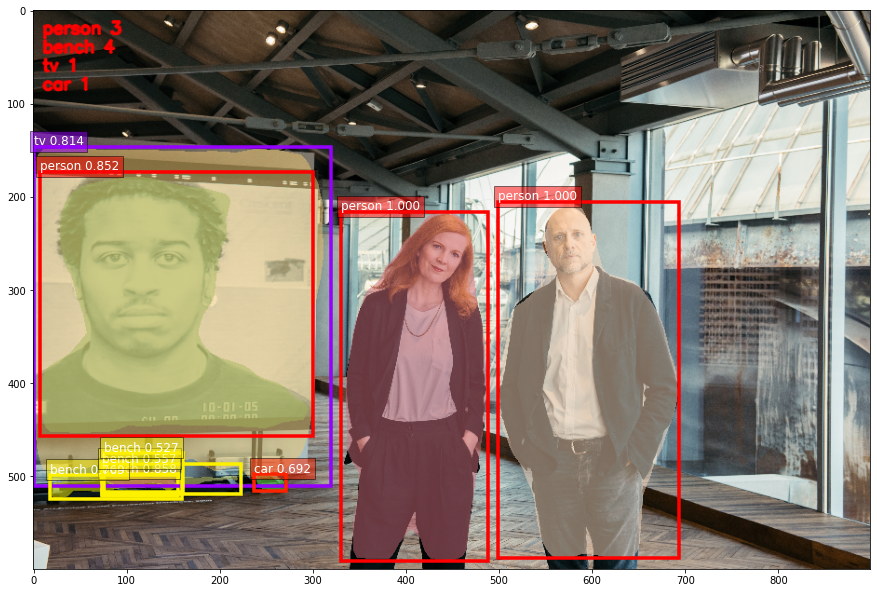

In [7]:
MASK_RCNN('2people.jpeg')

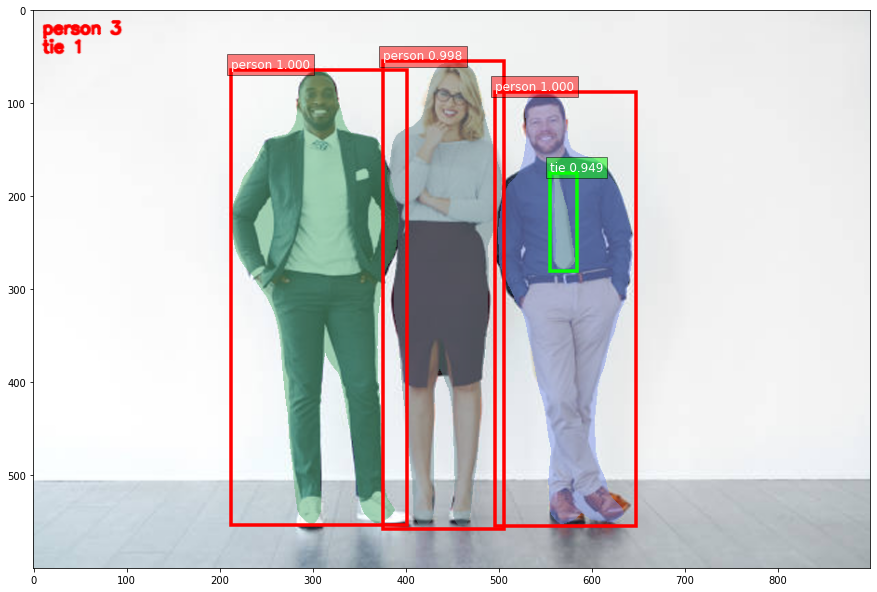

In [8]:
MASK_RCNN('3people.jpeg')

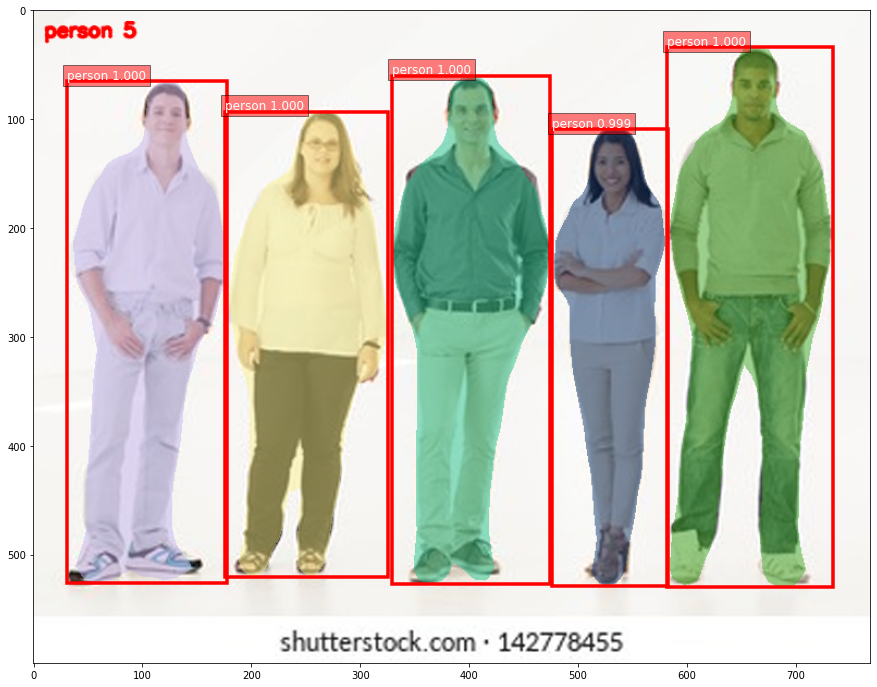

In [9]:
MASK_RCNN('5people.jpeg')

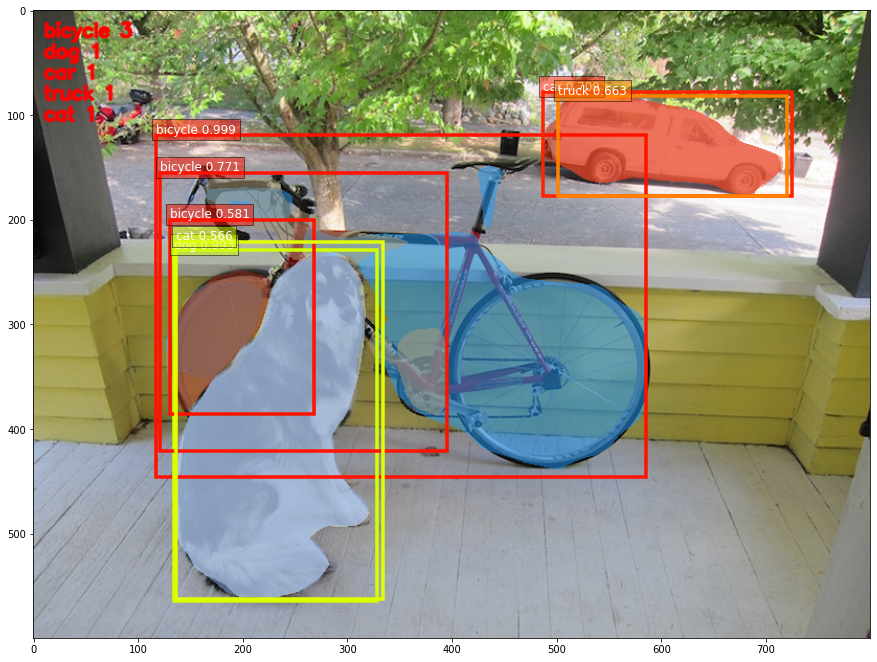

In [10]:
MASK_RCNN('dog.jpg')